# Project: Internet Users Worldwide
### by Alexandre Shimono

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

The main idea behind studying the usage of internet around the world is simply to better understand distribution of access and possibly make some projections. Basically we have only three dimensions on this dataset: the Country name, the Year, and the total number of persons with internet access. Based on this data it is possible to calculate an extra field of growth rate, which can be expressed as a percentage. Having such variations on our hands, we can answer some questions like what was the biggest internet growth from one year to another in one country in total number of users, or even if there has ever been a decrease in the number of users in any country (maybe due to some war, the arab spring, crysis in Syria?) at any given point.

Data was taken from https://www.gapminder.org/data/

In [77]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

We will be using Pandas Dataframes for this analysis.

### General Properties

In [78]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
internet_users = pd.read_excel('Internet user total.xlsx')
internet_users.head()

,"Internet users, total number",1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1123.920517,22569.277533,2.824412e+04,3.380450e+05,5.988651e+05,5.537710e+05,5.490559e+05,1.085510e+06,1256469.72,NaN
1,Albania,0.0,NaN,NaN,NaN,NaN,350.820117,1002.157509,1502.476346,2002.216783,...,12052.645369,30194.039918,7.563375e+04,1.898870e+05,3.033497e+05,4.765945e+05,7.590813e+05,1.315402e+06,1441927.80,NaN
2,Algeria,0.0,NaN,NaN,NaN,100.090832,500.465235,500.469039,3002.798156,6005.526744,...,500441.425787,700615.293472,1.501387e+06,1.921982e+06,2.462986e+06,3.204578e+06,3.504773e+06,3.924904e+06,4433526.00,NaN
3,American Samoa,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,0.0,NaN,NaN,NaN,NaN,NaN,995.756049,1979.716334,4424.113974,...,7774.565416,9780.916489,2.020683e+04,2.929038e+04,3.908782e+04,5.768109e+04,5.783693e+04,6.571155e+04,68739.84,NaN


We notice that some lines have only NaN values, which makes no sense. Those should be removed. Also, we notice that some nations do not have values for old dates, which makes sense since the internet started rising globally according to Wikipedia (not as a research tool between Universities) just since early 90s. For this reason, I will choose the year 2001 as a reference, and if the country has a NaN value the entire line will be removed. Afterward, all NaN values will be replaced by zeroes. We will also rename the index column to "Country".

In [79]:
internet_users = internet_users[np.isfinite(internet_users['2001'])]
internet_users.fillna(0,inplace=True)
internet_users = internet_users.rename(columns={'Internet users, total number':'Country'})
internet_users.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1123.920517,22569.277533,2.824412e+04,3.380450e+05,5.988651e+05,5.537710e+05,5.490559e+05,1.085510e+06,1256469.72,0.0
1,Albania,0.0,0.0,0.0,0.0,0.000000,350.820117,1002.157509,1502.476346,2002.216783,...,12052.645369,30194.039918,7.563375e+04,1.898870e+05,3.033497e+05,4.765945e+05,7.590813e+05,1.315402e+06,1441927.80,0.0
2,Algeria,0.0,0.0,0.0,0.0,100.090832,500.465235,500.469039,3002.798156,6005.526744,...,500441.425787,700615.293472,1.501387e+06,1.921982e+06,2.462986e+06,3.204578e+06,3.504773e+06,3.924904e+06,4433526.00,0.0
5,Angola,0.0,0.0,0.0,0.0,0.000000,0.000000,96.624245,725.799034,2424.499171,...,40260.379005,57158.963169,7.417261e+04,1.885300e+05,3.244978e+05,5.608117e+05,8.297463e+05,1.113307e+06,1908191.20,0.0
6,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.000000,1510.651721,2013.777727,2517.193852,3020.806471,...,10063.375000,14078.562638,2.010192e+04,2.913262e+04,5.321297e+04,6.020606e+04,6.518681e+04,6.514908e+04,70968.00,0.0


Now, we can have a more general view of the whole dataset with the describe function:

In [80]:
internet_users.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,...,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,196.0
mean,1.340288e+04,2.185336e+04,3.495840e+04,5.044544e+04,1.030947e+05,1.984319e+05,3.694079e+05,5.921310e+05,9.231412e+05,1.388812e+06,...,3.306814e+06,3.872760e+06,4.503447e+06,5.135800e+06,5.786826e+06,6.900786e+06,7.974482e+06,9.010653e+06,1.029808e+07,0.0
std,1.424906e+05,2.137989e+05,3.205830e+05,4.275411e+05,9.213485e+05,1.768884e+06,3.191477e+06,4.324240e+06,6.129312e+06,7.656223e+06,...,1.421755e+07,1.562491e+07,1.728795e+07,1.872051e+07,2.016719e+07,2.453651e+07,2.902002e+07,3.386430e+07,3.906940e+07,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.532582e+02,7.825498e+02,1.988207e+03,4.968147e+03,...,2.441795e+04,3.006752e+04,3.670026e+04,4.923302e+04,6.745723e+04,8.333297e+04,1.026825e+05,1.123229e+05,1.481696e+05,0.0
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.504101e+02,2.000100e+03,4.992679e+03,1.014368e+04,2.813967e+04,...,1.235731e+05,1.529147e+05,2.126868e+05,3.392482e+05,4.836016e+05,5.793525e+05,7.880628e+05,9.252343e+05,1.293429e+06,0.0
75%,0.000000e+00,0.000000e+00,0.000000e+00,9.366564e+02,4.467333e+03,1.952791e+04,4.411411e+04,8.699426e+04,1.501114e+05,2.450025e+05,...,1.040248e+06,1.406971e+06,1.866206e+06,2.622681e+06,3.076977e+06,3.391346e+06,4.237466e+06,4.594224e+06,5.170963e+06,0.0
max,1.988024e+06,2.975535e+06,4.453200e+06,5.924598e+06,1.281192e+07,2.460056e+07,4.423269e+07,5.893568e+07,8.305303e+07,1.001255e+08,...,1.695767e+08,1.797180e+08,1.904301e+08,2.017430e+08,2.064934e+08,2.267134e+08,3.001903e+08,3.857886e+08,4.600780e+08,0.0



### Data Cleaning (Replace this with more specific notes!)

There is something odd about the year 2011: all values are zeroes. It seems this whole column should be removed.

In [81]:
internet_users = internet_users.drop(columns=['2011'])
internet_users.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1118.180665,1123.920517,22569.277533,2.824412e+04,3.380450e+05,5.988651e+05,5.537710e+05,5.490559e+05,1.085510e+06,1256469.72
1,Albania,0.0,0.0,0.0,0.0,0.000000,350.820117,1002.157509,1502.476346,2002.216783,...,10026.047580,12052.645369,30194.039918,7.563375e+04,1.898870e+05,3.033497e+05,4.765945e+05,7.590813e+05,1.315402e+06,1441927.80
2,Algeria,0.0,0.0,0.0,0.0,100.090832,500.465235,500.469039,3002.798156,6005.526744,...,200180.427339,500441.425787,700615.293472,1.501387e+06,1.921982e+06,2.462986e+06,3.204578e+06,3.504773e+06,3.924904e+06,4433526.00
5,Angola,0.0,0.0,0.0,0.0,0.000000,0.000000,96.624245,725.799034,2424.499171,...,19570.007120,40260.379005,57158.963169,7.417261e+04,1.885300e+05,3.244978e+05,5.608117e+05,8.297463e+05,1.113307e+06,1908191.20
6,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.000000,1510.651721,2013.777727,2517.193852,3020.806471,...,7045.119378,10063.375000,14078.562638,2.010192e+04,2.913262e+04,5.321297e+04,6.020606e+04,6.518681e+04,6.514908e+04,70968.00


It seems odd that the description of the dataset from the source says "Internet users, total number", but numbers do not have integer values. How is it possible to have a fraction of a human being? After looking at the original source (apparently, gapminder is a hub of data), it seems the total number of internet users per country is in fact the product of the percentage of internet users by the population of the country. So, in order to make more sense, it seems another function will have to be applied to round the number up.

In [82]:
columns = []
for year in range(1990,2011):
    columns.append(str(year))
internet = internet_users[columns].applymap(np.int64)
internet.insert(loc=0,column='Country',value=internet_users['Country'])
internet.set_index('Country', inplace=True)
internet_users = internet
internet_users.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1118,1123,22569,28244,338045,598865,553770,549055,1085510,1256469
Albania,0,0,0,0,0,350,1002,1502,2002,2502,...,10026,12052,30194,75633,189886,303349,476594,759081,1315401,1441927
Algeria,0,0,0,0,100,500,500,3002,6005,60054,...,200180,500441,700615,1501386,1921981,2462985,3204577,3504773,3924903,4433526
Angola,0,0,0,0,0,0,96,725,2424,9723,...,19570,40260,57158,74172,188529,324497,560811,829746,1113306,1908191
Antigua and Barbuda,0,0,0,0,0,1510,2013,2517,3020,4027,...,7045,10063,14078,20101,29132,53212,60206,65186,65149,70968


So now it seems we have nice data and we are ready to start our investigation!

<a id='eda'></a>
## Exploratory Data Analysis

So, first thing we could do to analyze our data is to get a nice overview of maximum and minimuns. Let's start by getting a list of which country had the max and min values in each year.

In [83]:
internet_users.apply(lambda x: x.idxmax(), axis=0)


1990    United States
1991    United States
1992    United States
1993    United States
1994    United States
1995    United States
1996    United States
1997    United States
1998    United States
1999    United States
2000    United States
2001    United States
2002    United States
2003    United States
2004    United States
2005    United States
2006    United States
2007    United States
2008            China
2009            China
2010            China
dtype: object

So far we have our first interesting observation about the data: American leadership was taken out by China in 2008 in terms of absolute numbers, which is understandable considering the size of chinese poupulation.

In [84]:
internet_users.apply(lambda x: x.idxmin(), axis=0)


1990         Afghanistan
1991         Afghanistan
1992         Afghanistan
1993         Afghanistan
1994         Afghanistan
1995         Afghanistan
1996         Afghanistan
1997         Afghanistan
1998         Afghanistan
1999         Afghanistan
2000         Afghanistan
2001    Korea, Dem. Rep.
2002           Australia
2003           Australia
2004           Australia
2005             Belarus
2006              Guyana
2007              Guyana
2008    Korea, Dem. Rep.
2009             Eritrea
2010                Guam
dtype: object

In [85]:
internet_users.min(axis=0)

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
dtype: int64

It is weird to see Australia in the list with lowest internet access, but what seems to be happening is that the country apparently is missing data for those years. The same must be happening to all countries that had internet internet access in any previous year and had a zero value in any subsequent time. 

In [86]:
internet_users.loc[list_countries_min_values_to_check]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,,,,,,
Kiribati,0,0,0,0,0,0,0,0,499,999,...,1999,2178,2663,3163,3679,4209,5702,6757,7842,8959
Tonga,0,0,0,0,0,118,157,493,741,991,...,2782,2879,2975,3963,4953,5946,7341,8346,10351,12486
Samoa,0,0,0,0,0,0,0,299,399,499,...,3002,4006,5015,5526,6042,8078,8610,9147,10944,12815
Gibraltar,0,0,0,0,0,0,0,725,1137,1615,...,5846,6625,8047,9468,11359,13243,15119,16986,19037,19008
Vanuatu,0,0,0,0,0,0,97,244,487,975,...,5365,6828,7805,9757,10732,12681,15121,16576,17534,19172


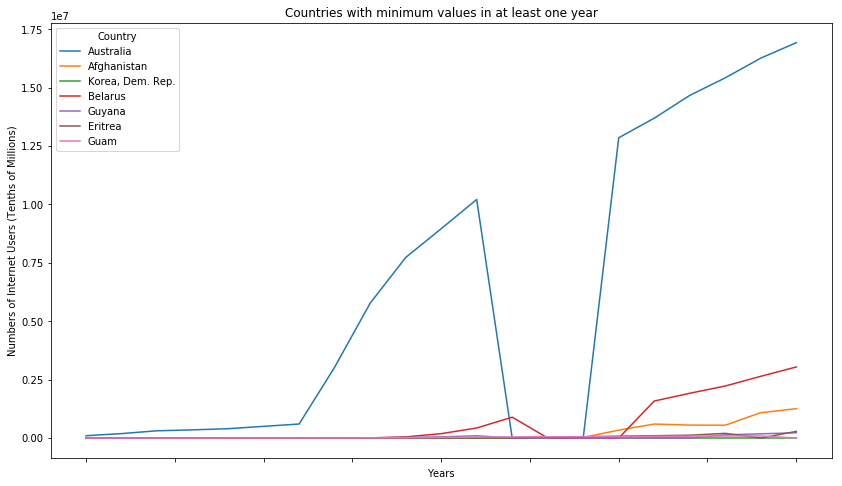

In [87]:
list_countries_min_values_to_check = ['Australia','Afghanistan','Korea, Dem. Rep.','Belarus','Guyana','Eritrea','Guam']
transposed_internet_users = internet_users.loc[list_countries_min_values_to_check].transpose().plot(figsize=(14,8),title='Countries with minimum values in at least one year')
transposed_internet_users.set(xlabel='Years', ylabel='Numbers of Internet Users (Tenths of Millions)')
plt.show()


So it seems we might have two possible alternatives. First is to fill those missing gaps with some sort of approximation of the value expected. For this we probably would have to make a function to calculate those values. Second would be to try to remove the 0 values for those specific points and try to force matplot to smooth the graph.

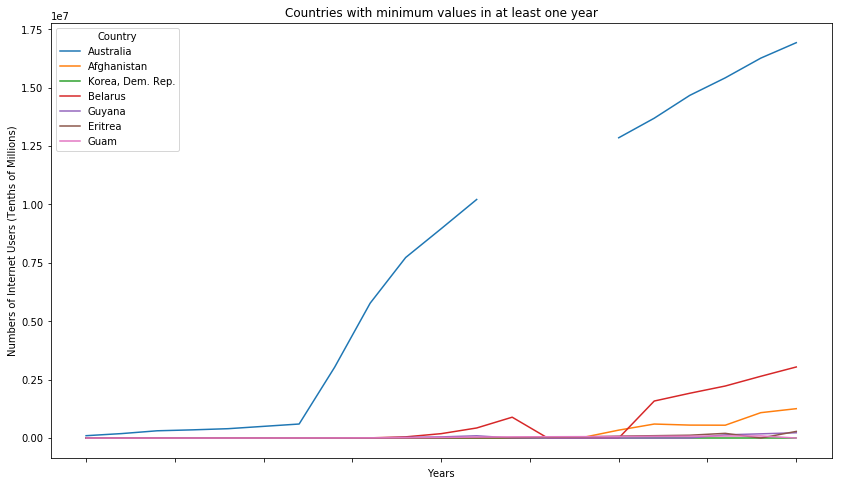

In [88]:
internet_users.at['Australia','2002']=None
internet_users.at['Australia','2003']=None
internet_users.at['Australia','2004']=None
transposed_internet_users = internet_users.loc[list_countries_min_values_to_check].transpose().plot(figsize=(14,8),title='Countries with minimum values in at least one year')
transposed_internet_users.set(xlabel='Years', ylabel='Numbers of Internet Users (Tenths of Millions)')
plt.show()

It seems it does not perform such task automatically, so we have to force it somehow. After some Google research, found out that in fact my mistake was to manually set all those values to zero in the beginning. Instead, I should have removed the NaN values with the dropna() function. So let's start it over.

In [89]:
internet_users = pd.read_excel('Internet user total.xlsx')
internet_users = internet_users[np.isfinite(internet_users['2001'])]
internet_users = internet_users.rename(columns={'Internet users, total number':'Country'})
internet_users = internet_users.drop(columns=['2011'])
internet = internet_users.fillna(value=0)
internet = internet.round(0)
internet_users = internet[internet_users.notna()]
#internet_users = internet_users.fillna(value='')
internet_users.set_index('Country',drop=True, inplace=True)
internet_users



,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1118.0,1124.0,22569.0,28244.0,338045.0,598865.0,553771.0,549056.0,1085510.0,1256470.0
Albania,0.0,NaN,NaN,NaN,NaN,351.0,1002.0,1502.0,2002.0,2502.0,...,10026.0,12053.0,30194.0,75634.0,189887.0,303350.0,476594.0,759081.0,1315402.0,1441928.0
Algeria,0.0,NaN,NaN,NaN,100.0,500.0,500.0,3003.0,6006.0,60055.0,...,200180.0,500441.0,700615.0,1501387.0,1921982.0,2462986.0,3204578.0,3504773.0,3924904.0,4433526.0
Angola,0.0,NaN,NaN,NaN,NaN,NaN,97.0,726.0,2424.0,9723.0,...,19570.0,40260.0,57159.0,74173.0,188530.0,324498.0,560812.0,829746.0,1113307.0,1908191.0
Antigua and Barbuda,0.0,NaN,NaN,NaN,NaN,1511.0,2014.0,2517.0,3021.0,4028.0,...,7045.0,10063.0,14079.0,20102.0,29133.0,53213.0,60206.0,65187.0,65149.0,70968.0
Argentina,0.0,NaN,1004.0,10034.0,15044.0,30072.0,50092.0,100123.0,300195.0,1200184.0,...,3648448.0,4097919.0,4527354.0,6148589.0,6854530.0,8166600.0,10214688.0,11164731.0,13621240.0,14548455.0
Armenia,0.0,NaN,NaN,NaN,300.0,1700.0,3000.0,3500.0,4000.0,30002.0,...,50006.0,60009.0,140027.0,150038.0,161054.0,172887.0,185104.0,191211.0,472002.0,1360512.0
Aruba,0.0,NaN,NaN,NaN,NaN,NaN,2300.0,NaN,NaN,3985.0,...,15794.0,17784.0,20150.0,22781.0,25653.0,28759.0,32206.0,36090.0,40193.0,45145.0
Australia,100029.0,190043.0,310055.0,350047.0,400033.0,500006.0,600014.0,3032449.0,5772823.0,7727668.0,...,10212333.0,NaN,NaN,NaN,12854218.0,13691235.0,14667832.0,15418953.0,16262458.0,16923972.0


In [90]:
internet_users.min(axis=0)

1990       0.0
1991       0.0
1992       0.0
1993       0.0
1994       0.0
1995       0.0
1996       0.0
1997       0.0
1998       0.0
1999       0.0
2000       0.0
2001       0.0
2002       0.0
2003       0.0
2004       0.0
2005       0.0
2006       0.0
2007       0.0
2008       0.0
2009       0.0
2010    8959.0
dtype: float64

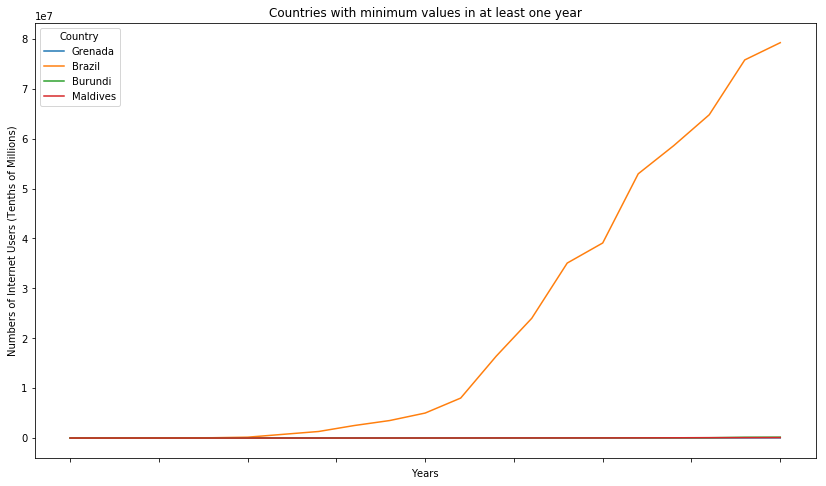

In [91]:
list_countries_min_values_to_check = ['Grenada','Brazil','Burundi','Maldives']
min_values_internet_users = internet_users.loc[list_countries_min_values_to_check].T.plot(figsize=(14,8),title='Countries with minimum values in at least one year')
min_values_internet_users.set(xlabel='Years', ylabel='Numbers of Internet Users (Tenths of Millions)')
plt.show() 

We can also see the 5 smallest values in 2010 and see how they behaved over the years:

In [92]:
internet_users['2010'].sort_values().head(5)

Country
Kiribati      8959.0
Tonga        12487.0
Samoa        12816.0
Gibraltar    19009.0
Vanuatu      19172.0
Name: 2010, dtype: float64

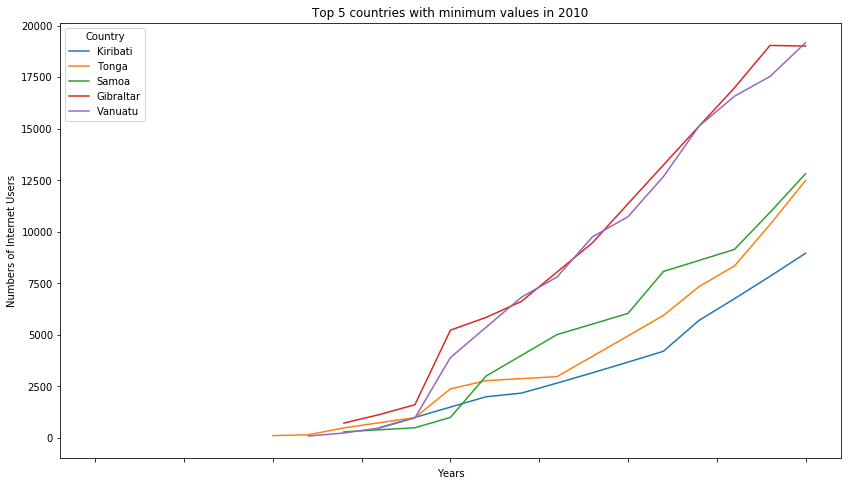

In [93]:
list_countries_min_values_to_check = ['Kiribati','Tonga','Samoa','Gibraltar','Vanuatu']
min_values_internet_users = internet_users.loc[list_countries_min_values_to_check].transpose().plot(figsize=(14,8),title='Top 5 countries with minimum values in 2010')
min_values_internet_users.set(xlabel='Years', ylabel='Numbers of Internet Users')
plt.show() 

Also, we can check the top 5 in absolute numbers:

In [94]:
internet_users['2010'].sort_values(ascending=False).head(5)

Country
China            460077957.0
United States    229684122.0
Japan             98951089.0
India             91846075.0
Brazil            79245740.0
Name: 2010, dtype: float64

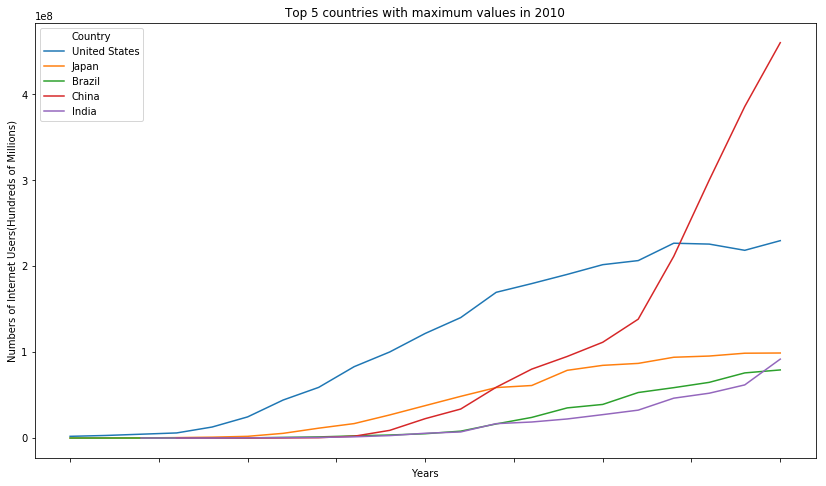

In [95]:
list_countries_max_values_to_check = ['United States','Japan','Brazil','China','India']
max_values_internet_users = internet_users.loc[list_countries_max_values_to_check].transpose().plot(figsize=(14,8),title='Top 5 countries with maximum values in 2010')
max_values_internet_users.set(xlabel='Years', ylabel='Numbers of Internet Users(Hundreds of Millions)')
plt.show()

### Which country had the largest internet boom?

To answer this question we should calculate something like the derivate of the graph for each country (Newton and Leibniz say hello) and then find the largest value overall. To do this, unfortunatelly, we will have to deal with some unpleasant NaN mess which will prevent us from dealing with this "pandas style": we will have to use loops and ifs.

In [96]:
#first will remove all values that are None in 2010
internet_users = internet_users[np.isfinite(internet_users['2010'])]
year_list = []
year_diff_list = []
for year in range(1990,2011):
    year_list.append(str(year))
for year in range(1990,2010):
    year_diff_list.append(str(year)+'-'+str(year+1))
internet_users_variation = pd.DataFrame(columns=year_diff_list)
for index,row in internet_users.iterrows():
    next_row = []
    i = 0
    while i < len(year_list)-1:
        if np.isnan(row[year_list[i+1]]) and not np.isnan(row[year_list[i]]) and i != 19:
            k=2
            stop = False
            #print('Entered in '+index+' with an i of ' + str(i))
            while k+i < len(year_list) and not stop:
                #print('First loop in '+index+' with an k of '+str(k))
                if not np.isnan(row[year_list[i+k]]):
                    #print('Found non None in '+index+' in column number '+str(i+k))
                    stop = True
                    diff = (row[year_list[i+k]] - row[year_list[i]])/k
                    j=1
                    while j<=k:
                        #print('Second loop in '+index+' with an j of '+str(j)+' appending '+str(j*diff))
                        next_row.append(j*diff)
                        j+=1
                else:
                    k += 1
            i += k
            #print('Value of i at the end of the first loop is '+ str(i))
            
        else:
            #print('Adding simple difference with i of '+str(i))
            next_row.append(row[year_list[i+1]]-row[year_list[i]])
            i += 1
    #print(len(next_row))
    #print(index)
    #print(len(year_diff_list))
    #print(len(next_row))
    #print('Appending row to '+index)
    internet_users_variation.loc[index] = next_row
internet_users_variation.head(10)

,1990-1991,1991-1992,1992-1993,1993-1994,1994-1995,1995-1996,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010
Afghanistan,101.636364,203.272727,304.909091,406.545455,508.181818,609.818182,7.114545e+02,8.130909e+02,9.147273e+02,1.016364e+03,1118.0,6.00,21445.0,5675.00,309801.0,260820.0,-45094.0,-4715.0,536454.0,170960.0
Albania,70.200000,140.400000,210.600000,280.800000,351.000000,651.000000,5.000000e+02,5.000000e+02,5.000000e+02,1.003000e+03,6521.0,2027.00,18141.0,45440.00,114253.0,113463.0,173244.0,282487.0,556321.0,126526.0
Algeria,25.000000,50.000000,75.000000,100.000000,400.000000,0.000000,2.503000e+03,3.003000e+03,5.404900e+04,9.008200e+04,50043.0,300261.00,200174.0,800772.00,420595.0,541004.0,741592.0,300195.0,420131.0,508622.0
Angola,16.166667,32.333333,48.500000,64.666667,80.833333,97.000000,6.290000e+02,1.698000e+03,7.299000e+03,4.906000e+03,4941.0,20690.00,16899.0,17014.00,114357.0,135968.0,236314.0,268934.0,283561.0,794884.0
Antigua and Barbuda,302.200000,604.400000,906.600000,1208.800000,1511.000000,503.000000,5.030000e+02,5.040000e+02,1.007000e+03,1.006000e+03,2011.0,3018.00,4016.0,6023.00,9031.0,24080.0,6993.0,4981.0,-38.0,5819.0
Argentina,502.000000,1004.000000,9030.000000,5010.000000,15028.000000,20020.000000,5.003100e+04,2.000720e+05,8.999890e+05,1.399252e+06,1049012.0,449471.00,429435.0,1621235.00,705941.0,1312070.0,2048088.0,950043.0,2456509.0,927215.0
Armenia,75.000000,150.000000,225.000000,300.000000,1400.000000,1300.000000,5.000000e+02,5.000000e+02,2.600200e+04,1.000200e+04,10002.0,10003.00,80018.0,10011.00,11016.0,11833.0,12217.0,6107.0,280791.0,888510.0
Aruba,383.333333,766.666667,1150.000000,1533.333333,1916.666667,2300.000000,5.616667e+02,1.123333e+03,1.685000e+03,9.955000e+03,1854.0,1990.00,2366.0,2631.00,2872.0,3106.0,3447.0,3884.0,4103.0,4952.0
Australia,90014.000000,120012.000000,39992.000000,49986.000000,99973.000000,100008.000000,2.432435e+06,2.740374e+06,1.954845e+06,1.232838e+06,1251827.0,660471.25,1320942.5,1981413.75,2641885.0,837017.0,976597.0,751121.0,843505.0,661514.0
Austria,10000.000000,30000.000000,10000.000000,50000.000000,40000.000000,400001.000000,2.100050e+05,4.700080e+05,6.100040e+05,8.599820e+05,449915.0,-194749.00,518152.0,969800.00,331556.0,487086.0,502736.0,314178.0,68826.0,-45321.0


To answer our question we simply perform a max_value search in the whole dataset.

In [97]:
internet_users_variation.loc['China']

1990-1991    6.683333e+02
1991-1992    1.336667e+03
1992-1993    2.005000e+03
1993-1994    1.203000e+04
1994-1995    4.611500e+04
1995-1996    1.002490e+05
1996-1997    2.406010e+05
1997-1998    1.704102e+06
1998-1999    6.814362e+06
1999-2000    1.361895e+07
2000-2001    1.119377e+07
2001-2002    2.536553e+07
2002-2003    2.109288e+07
2003-2004    1.474971e+07
2004-2005    1.650925e+07
2005-2006    2.688585e+07
2006-2007    7.310170e+07
2007-2008    8.875316e+07
2008-2009    8.559838e+07
2009-2010    7.428931e+07
Name: China, dtype: float64

In [98]:
internet_users_variation.max().idxmax()

'2007-2008'

In [99]:
internet_users_variation.idxmax(axis=0)

1990-1991    United States
1991-1992    United States
1992-1993    United States
1993-1994    United States
1994-1995    United States
1995-1996    United States
1996-1997    United States
1997-1998    United States
1998-1999    United States
1999-2000    United States
2000-2001    United States
2001-2002    United States
2002-2003            China
2003-2004            Japan
2004-2005            China
2005-2006            China
2006-2007            China
2007-2008            China
2008-2009            China
2009-2010            China
dtype: object

So China from 2007-2008 had the largest internet user growth of our dataset!

### Did internet users got smaller in any country?

In order to answer this question, we list all minimum values of our table.


In [100]:
internet_users_variation.min()

1990-1991          0.0
1991-1992          0.0
1992-1993          0.0
1993-1994          0.0
1994-1995         -6.0
1995-1996          0.0
1996-1997      -1041.0
1997-1998         -2.0
1998-1999         -7.0
1999-2000         -6.0
2000-2001    -190011.0
2001-2002    -194749.0
2002-2003        -12.0
2003-2004      -8744.0
2004-2005    -399920.0
2005-2006    -479559.0
2006-2007    -464761.0
2007-2008   -1154856.0
2008-2009   -7234329.0
2009-2010     -45321.0
dtype: float64

In [101]:
internet_users_variation.idxmin(axis=0)

1990-1991          Botswana
1991-1992           Burundi
1992-1993           Burundi
1993-1994           Burundi
1994-1995         Greenland
1995-1996           Algeria
1996-1997           Bahamas
1997-1998           Liberia
1998-1999          Dominica
1999-2000            Rwanda
2000-2001            Israel
2001-2002           Austria
2002-2003           Liberia
2003-2004              Oman
2004-2005      South Africa
2005-2006    United Kingdom
2006-2007            Sweden
2007-2008          Thailand
2008-2009     United States
2009-2010           Austria
dtype: object

So, answering the question, yes, there are many occasions in which the number of internet users got smaller in a country, and in fact it happened even in developed countries such as USA,UK, Sweden and Austria! We do not have enough info on the dataset however to know if this covers mobile internet usage or just cable/home internet plans.

<a id='conclusions'></a>
## Conclusions

We observe that overall internet users are growing worldwide, but there are some cases in which the number has decreased. One huge example is in USA during 2008 and 2009, probably because of the economic crisis, but we cannot asser it for sure because we could not determine if this database consolidates all internet users or only cable/home internet plans.

One noticeable country is China: if plotted against USA it is incredible to see the huge explosion of internet users and how it seems to never stop growing.
